In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime=pd.read_csv("/Users/jarispolly/Desktop/Entity Academy/DS105- Intermediate Stats/anime.csv")

In [53]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,sourceR
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012,Manga
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007,Manga
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008,Manga
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002,Other
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012,Manga


# Is a Rating Score of 6.2 Different from the Mean in this Dataset?

## Check for assumtions

<AxesSubplot:>

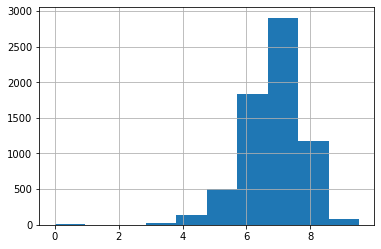

In [6]:
anime.score.hist()

### Yes it is normally distributed

In [8]:
stats.ttest_1samp(anime.score,6.2)

Ttest_1sampResult(statistic=57.14153988539698, pvalue=0.0)

### p value is less than .05 so it is significant which means it is different than the mean

In [9]:
anime.score.mean()

6.848998200359928

### the mean is higher

# Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

In [42]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

<AxesSubplot:>

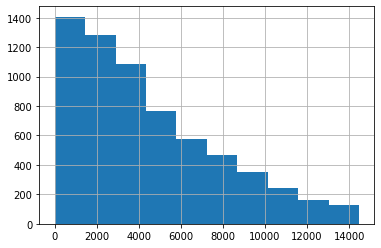

In [60]:
anime['popularity'][anime['status'] == 'Finished Airing'].hist()

<AxesSubplot:>

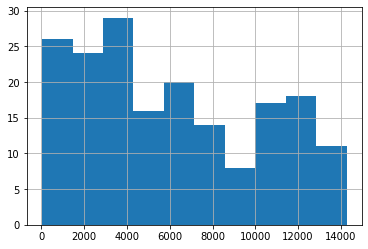

In [59]:
anime['popularity'][anime['status'] ==  'Currently Airing'].hist()

In [61]:
ttest_ind(anime['popularity'][anime['status'] ==  'Currently Airing'], anime['popularity'][anime['status'] == 'Finished Airing'])

Ttest_indResult(statistic=6.489071311277514, pvalue=9.256789141747445e-11)

In [62]:
anime['popularity'][anime['status'] == 'Currently Airing'].mean()

6108.131147540984

In [63]:
anime['popularity'][anime['status'] == 'Finished Airing'].mean()

4433.558057054742

##### Looks like there is significant difference between current and finished airing, since the p value is not more than .05 ? Mean popularity is higher in Animes that are Currently Airing.


# Does the Source of the Anime Influence the Type of Anime?

##### recode values in source column to fall into 4 categories(3rd question)

In [11]:
anime.source.value_counts()

Manga            2493
Original         1789
Light novel       512
Visual novel      482
Game              424
Novel             282
4-koma manga      194
Other             170
Web manga         111
Music              55
Picture book       53
Card game          46
Book               45
Digital manga       7
Radio               5
Name: source, dtype: int64

In [16]:
def source (series):
    if series =="4-koma manga":
        return "Manga"
    if series=="Digital manga":
        return "Manga"
    if series =="Manga":
        return "Manga"
    if series =="Web Manga":
        return"Manga"
    if series == "Book":
        return"Book"
    if series =="Light novel":
        return"Book"
    if series== "Novel":
        return"Book"
    if series =="Picture book":
        return"Book"
    if series=="Visual novel":
        return"Book"
    if series =="Card game":
        return"Game"
    if series=="Game":
        return"Game"
    if series =="Music":
        return"Listening"
    if series =="Radio":
        return"Listening"
    if series =="Other":
        return"Other"
    if series =="Original":
        return"Other"

In [20]:
anime['sourceR'] = anime['source'].apply(source)

In [24]:
anime.sourceR.value_counts()

Manga        2694
Other        1959
Book         1374
Game          470
Listening      60
Name: sourceR, dtype: int64

# How do the Variables about Popularity / Ranking Relate to Each Other?


## 
score,
scored_by,
rank,
popularity,
members,
favorites

In [67]:
import pandas as pd
from scipy import stats

In [75]:
anime1 = anime.drop(['anime_id','episodes','airing','duration_min','aired_from_year'], axis=1)

In [76]:
anime1.corr(method='pearson')

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094
scored_by,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949
rank,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503
popularity,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745
members,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565
favorites,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000


In [77]:
anime1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0


## Now you can very easily see that row of 1s, since they are all highlighted in red as a perfect correlation.  The warmer colors (shades of red/pinkk) are positive correlations, and the darker the color, the stronger the correlation. 

## The cooler colors (shades of blue) are negative correlations, and again, the stronger the correlation, the deeper or more vibrant the color. 

## Looks like average score_by correlates with a number of different things pretty strongly, and fairway percentaged correlates with average distance pretty well too*